## Installing gdown

In [1]:
!pip install --upgrade --no-cache-dir gdown

In [2]:
import gdown

file_id = "1nJ8Sbz3qZqj5t4hY5ylCP9iAl0XBAMZx"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "Bank_Dataset.csv"

gdown.download(url, File_dir, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nJ8Sbz3qZqj5t4hY5ylCP9iAl0XBAMZx
To: /content/Bank_Dataset.csv
100%|██████████| 1.51M/1.51M [00:00<00:00, 38.5MB/s]


'Bank_Dataset.csv'

# Q1

## 1.1

### Loading Data

In [3]:
import pandas as pd

df = pd.read_csv('Bank_Dataset.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Features

In [4]:
for i in range(len(df.columns)):
    print(df.columns[i])

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


### Numebr of Samples

In [5]:
print(len(df))
# or df.shape

10127


## 1.2

### Distributions for 4 Features

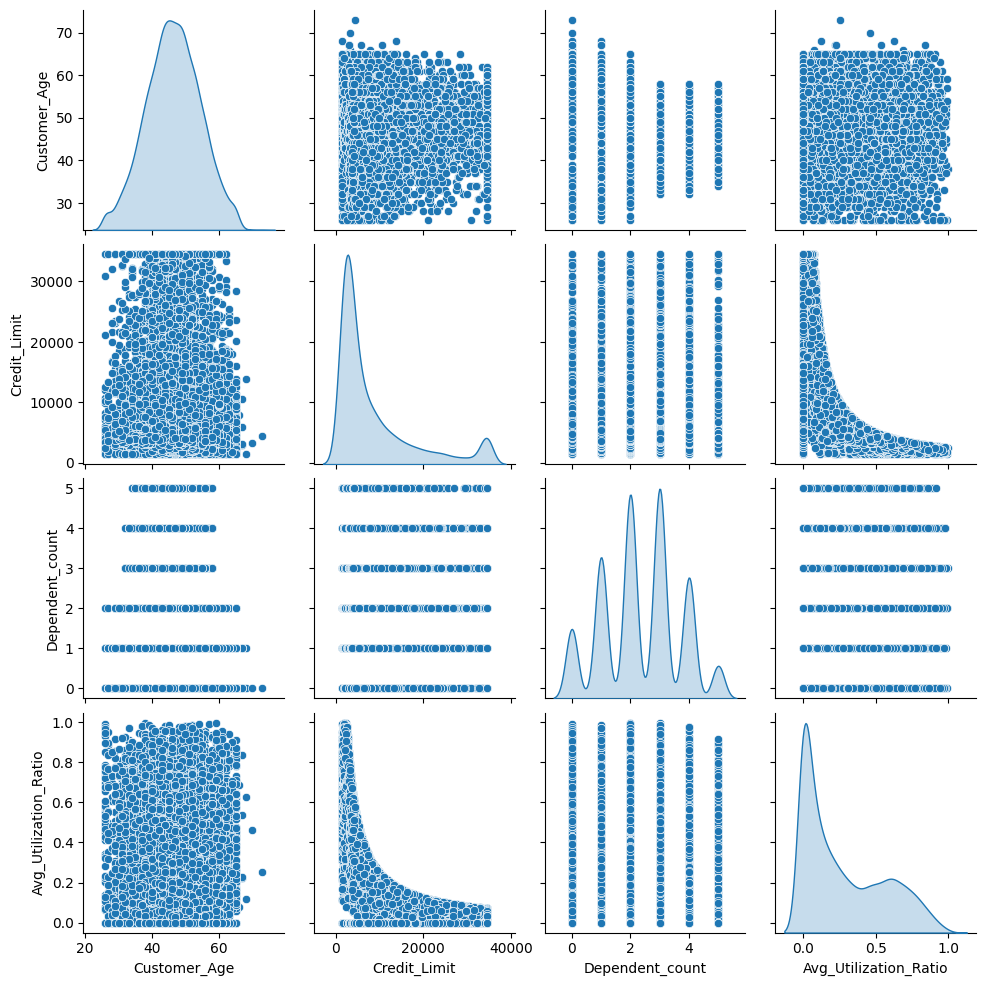

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of selected features
sns.pairplot(df, vars=["Customer_Age", "Credit_Limit", "Dependent_count", "Avg_Utilization_Ratio"], diag_kind='kde')

plt.show()


## 1.3

### Corr between 2 categorical features

In [7]:
# Convert Card_Category to numeric
# Blue = 0, Gold = 1, Silver = 2
card_category_mapping = {category: idx for idx, category in enumerate(df['Card_Category'].unique())}
df['Card_Category'] = df['Card_Category'].map(card_category_mapping)

In [8]:
# Convert Card_Category to numeric
# M = 0, F = 1
card_category_mapping = {category: idx for idx, category in enumerate(df['Gender'].unique())}
df['Gender'] = df['Gender'].map(card_category_mapping)

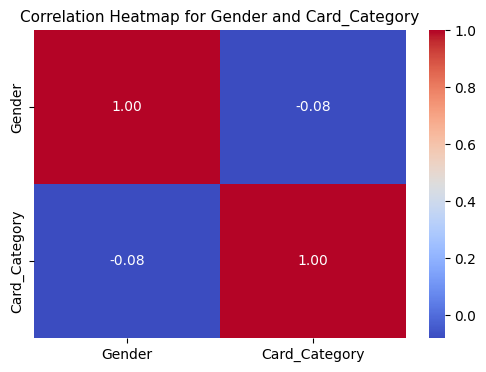

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for Gender and Card_Category
correlation_matrix = df[["Gender", "Card_Category"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap for Gender and Card_Category", fontsize=11)

plt.show()

### Corr between 2 continuous features

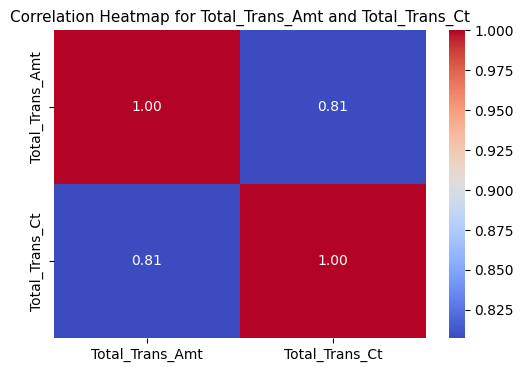

In [10]:
# Calculate the correlation matrix for Total_Trans_Amt and Total_Trans_Ct
correlation_matrix = df[["Total_Trans_Amt", "Total_Trans_Ct"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap for Total_Trans_Amt and Total_Trans_Ct", fontsize=11)

plt.show()

## 1.4

### nan Checker

In [11]:
# Check for NaN values in the dataset
nan_rows = df[df.isna().any(axis=1)]

# Display rows with NaN values (if any exist)
if not nan_rows.empty:
    print("Rows with NaN values:")
    print(nan_rows)

    print("\nRow numbers with NaN values:")
    print(nan_rows.index.tolist())

    df_cleaned = df.dropna()
    print("\nDataset after removing rows with NaN values:")
    print(df_cleaned)
else:
    print("No NaN values found in the dataset.")

No NaN values found in the dataset.


## 1.5

### Number Classes

In [12]:
# Check the unique values in the 'Attrition_Flag' column
unique_values = df["Attrition_Flag"].unique()

# Counting
num_classes = len(unique_values)

print("Unique values in 'Attrition_Flag':", unique_values)
print("Number of classes in 'Attrition_Flag':", num_classes)

Unique values in 'Attrition_Flag': ['Existing Customer' 'Attrited Customer']
Number of classes in 'Attrition_Flag': 2


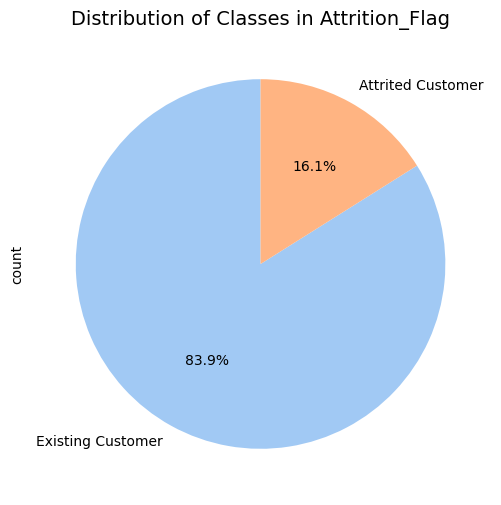

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the 'Attrition_Flag' column
class_counts = df["Attrition_Flag"].value_counts()

plt.figure(figsize=(6, 6))
class_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    labels=class_counts.index
)

plt.title("Distribution of Classes in Attrition_Flag", fontsize=14)

plt.show()

In [14]:
# Convert text categorical values into numeric values
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = pd.Categorical(df[column]).codes

print("Transformed Dataset:")
df

Transformed Dataset:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,0,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,1,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,0,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,1,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,0,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,0,2,2,2,1,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,0,2,6,0,1,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,1,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,0,2,2,3,1,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [15]:
X = df.drop(["Attrition_Flag",'CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)  # سایر ویژگی‌ها
y = df["Attrition_Flag"]

In [16]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,1,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,1,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,0,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,0,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [17]:
y

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1
...,...
10122,1
10123,0
10124,0
10125,0


### Unbalanced Data

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=53
)

# Further split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=53
)

print("Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Validation Set:")
print(y_val.value_counts(normalize=True))

print("\nClass Distribution in Test Set:")
print(y_test.value_counts(normalize=True))

Class Distribution in Training Set:
Attrition_Flag
1    0.839368
0    0.160632
Name: proportion, dtype: float64

Class Distribution in Validation Set:
Attrition_Flag
1    0.839506
0    0.160494
Name: proportion, dtype: float64

Class Distribution in Test Set:
Attrition_Flag
1    0.839092
0    0.160908
Name: proportion, dtype: float64


In [25]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=53)
model.fit(X_train, y_train)

# Predict on train and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [26]:
# Classification report and confusion matrix for training data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))


Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00      5100

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076



Confusion Matrix (Training Data):


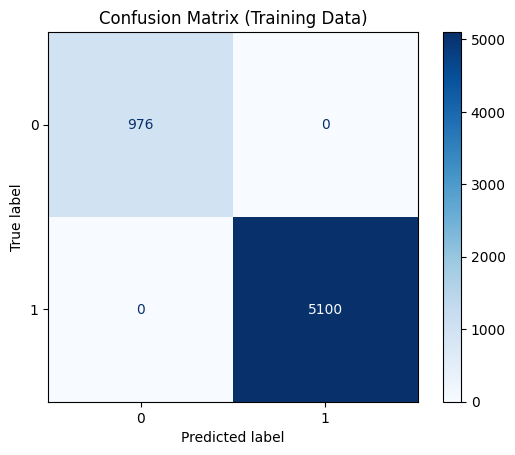

In [27]:
print("Confusion Matrix (Training Data):")
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix (Training Data)")
plt.show()


Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       325
           1       0.96      0.99      0.98      1700

    accuracy                           0.96      2025
   macro avg       0.95      0.90      0.92      2025
weighted avg       0.96      0.96      0.96      2025

Confusion Matrix (Validation Data):


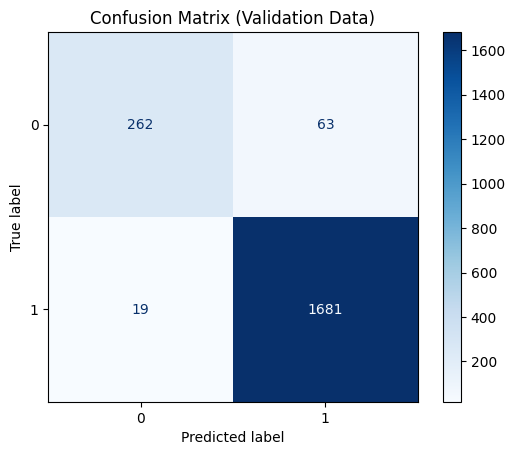

In [28]:
# Classification report and confusion matrix for validation data
print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix (Validation Data):")
cm_val = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=model.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Data)")
plt.show()

Accuracy on Test Data: 0.96

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       326
           1       0.96      0.99      0.98      1700

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Confusion Matrix (Test Data):


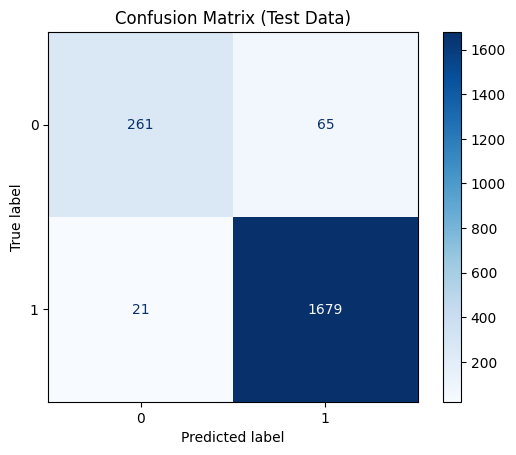

In [29]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Data: {test_accuracy:.2f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test Data):")
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix (Test Data)")
plt.show()

### Balanced Data

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=53)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verify the balance
print("Class Distribution After SMOTE:")
print(pd.Series(y_balanced).value_counts())

X_train, X_temp, y_train, y_temp = train_test_split(
    X_balanced, y_balanced, test_size=0.4, stratify=y_balanced, random_state=53
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=53
)

Class Distribution After SMOTE:
Attrition_Flag
1    8500
0    8500
Name: count, dtype: int64


In [31]:
model = RandomForestClassifier(random_state=53)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)


Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5100
           1       1.00      1.00      1.00      5100

    accuracy                           1.00     10200
   macro avg       1.00      1.00      1.00     10200
weighted avg       1.00      1.00      1.00     10200

Confusion Matrix (Training Data):


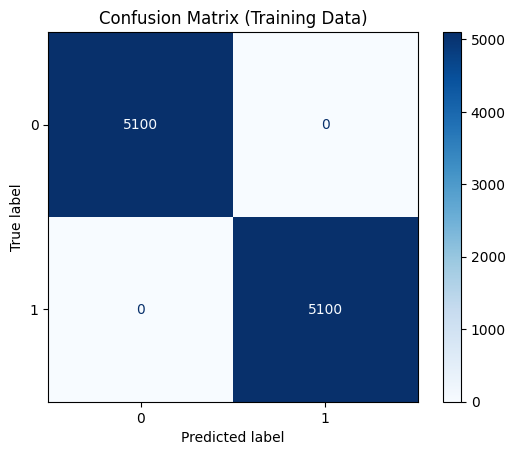


Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1700
           1       0.99      0.97      0.98      1700

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

Confusion Matrix (Validation Data):


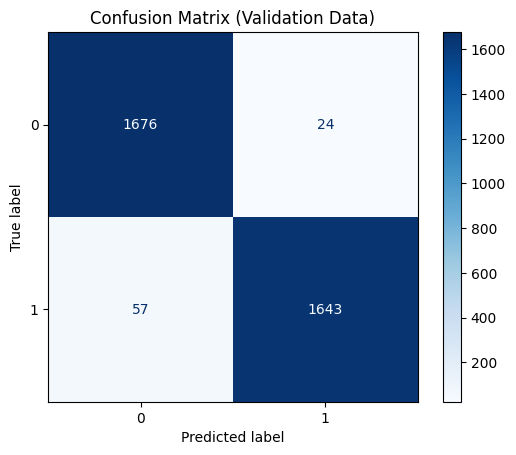

In [32]:
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix (Training Data):")
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred), display_labels=model.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix (Training Data)")
plt.show()

print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix (Validation Data):")
ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_pred), display_labels=model.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Data)")
plt.show()


Accuracy on Test Data: 0.98

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1700
           1       0.99      0.97      0.98      1700

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

Confusion Matrix (Test Data):


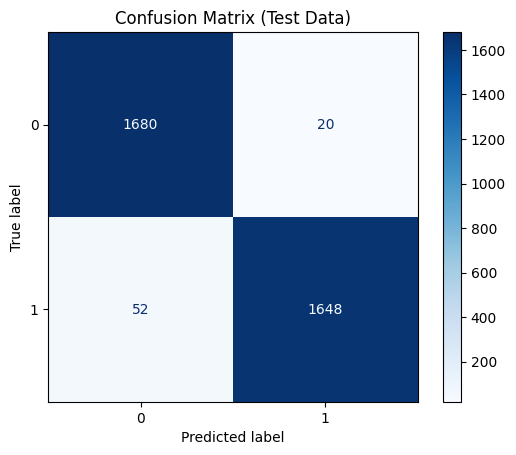

In [33]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Data: {test_accuracy:.2f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=model.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix (Test Data)")
plt.show()